In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
filename = "allBams.DP10.calls.vcf"
results = pd.read_csv(filename+".results_DP5.csv.gz")
results

Unnamed: 0 chrom        pos  \
0                 0  chr2      46145   
1                 1  chr2      46145   
2                 2  chr2     218386   
3                 3  chr2     218386   
4                 4  chr2     218386   
...             ...   ...        ...   
1293199     1293199  chr2  241768689   
1293200     1293200  chr2  241768689   
1293201     1293201  chr2  241768689   
1293202     1293202  chr2  241768689   
1293203     1293203  chr2  241768689   

                                                        s1  \
0                                 F008254-4-I-ExC93-xgenV2   
1        /sf/storage/gmo/hic/out/by_User/sykozyreva/SIX...   
2        /sf/storage/gmo/hic/out/by_User/sykozyreva/SIX...   
3        /sf/storage/gmo/hic/out/by_User/Galya/rnaseq_b...   
4        /sf/storage/gmo/hic/out/by_User/sykozyreva/SIX...   
...                                                    ...   
1293199  /sf/storage/gmo/hic/out/by_User/sykozyreva/SIX...   
1293200  /sf/storage/gmo/hic/out/by_User/sykozyreva/SIX...   
1293201  /sf/storage/gmo/hic/out/by_User/sykozyreva/SIX...   
1293202  /sf/storage/gmo/hic/out/by_User/sykozyreva/SIX...   
1293203  /sf/storage/gmo/hic/out/by_User/sykozyreva/SIX...   

                                                        s2  shAllels  \
0        /sf/storage/gmo/hic/out/by_User/sykozyreva/SIX...         2   
1                                 F008254-4-I-ExC93-xgenV2         2   
2        /sf/storage/gmo/hic/out/by_User/Galya/rnaseq_b...         2   
3        /sf/storage/gmo/hic/out/by_User/sykozyreva/SIX...         2   
4        /sf/storage/gmo/hic/out/by_User/Galya/rnaseq_b...         2   
...                                                    ...       ...   
1293199  /sf/storage/gmo/hic/out/by_User/Galya/rnaseq_b...         1   
1293200  /sf/storage/gmo/hic/out/by_User/sykozyreva/SIX...         1   
1293201  /sf/storage/gmo/hic/out/by_User/sykozyreva/SIX...         1   
1293202  /sf/storage/gmo/hic/out/by_User/sykozyreva/SIX...         1   
1293203  /sf/storage/gmo/hic/out/by_User/sykozyreva/SIX...         1   

                 s1short           s2short  
0             exome_P142   RNAseq_4-2-P142  
1        RNAseq_4-2-P142        exome_P142  
2             RNAseq_1-1       RNAseq_P142  
3            RNAseq_P142        RNAseq_1-1  
4             RNAseq_1-1      RNAseq_181-1  
...                  ...               ...  
1293199       RNAseq_6-1  RNAseq_5-2g-P181  
1293200  RNAseq_5-2-P181        RNAseq_6-1  
1293201       RNAseq_6-1   RNAseq_5-2-P181  
1293202       RNAseq_6-1        RNAseq_6-2  
1293203       RNAseq_6-2        RNAseq_6-1  

[1293204 rows x 8 columns]

In [4]:
_ = results.groupby(["s1short","s2short"])["shAllels"].apply(lambda x: pd.concat([x.value_counts(),
                                                                   x.value_counts(normalize=True)],
                                                                   axis=1
                                                                  ).sort_index())
summary = _.reset_index().rename(columns={"level_2":"n_alleles"})
summary["experiment1"] = summary["s1short"].apply(lambda x: x.split("_")[0])
summary["experiment2"] = summary["s2short"].apply(lambda x: x.split("_")[0])
summary

s1short       s2short  n_alleles  count  proportion experiment1  \
0     RNAseq_1-1    RNAseq_1-2          0     37    0.008188      RNAseq   
1     RNAseq_1-1    RNAseq_1-2          1    656    0.145165      RNAseq   
2     RNAseq_1-1    RNAseq_1-2          2   3826    0.846647      RNAseq   
3     RNAseq_1-1  RNAseq_181-1          0     94    0.042171      RNAseq   
4     RNAseq_1-1  RNAseq_181-1          1    607    0.272319      RNAseq   
...          ...           ...        ...    ...         ...         ...   
1435  exome_P142   enrich_P143          1      5    0.416667       exome   
1436  exome_P142   enrich_P143          2      2    0.166667       exome   
1437  exome_P142   enrich_P181          0      6    0.375000       exome   
1438  exome_P142   enrich_P181          1      9    0.562500       exome   
1439  exome_P142   enrich_P181          2      1    0.062500       exome   

     experiment2  
0         RNAseq  
1         RNAseq  
2         RNAseq  
3         RNAseq  
4         RNAseq  
...          ...  
1435      enrich  
1436      enrich  
1437      enrich  
1438      enrich  
1439      enrich  

[1440 rows x 7 columns]

In [5]:
summary.query("experiment1=='exome' and experiment2=='RNAseq'")

s1short           s2short  n_alleles  count  proportion experiment1  \
1374  exome_P142        RNAseq_1-1          0   1881    0.534072       exome   
1375  exome_P142        RNAseq_1-1          1   1293    0.367121       exome   
1376  exome_P142        RNAseq_1-1          2    348    0.098807       exome   
1377  exome_P142        RNAseq_1-2          0   1915    0.546674       exome   
1378  exome_P142        RNAseq_1-2          1   1246    0.355695       exome   
1379  exome_P142        RNAseq_1-2          2    342    0.097631       exome   
1380  exome_P142      RNAseq_181-1          0    147    0.110526       exome   
1381  exome_P142      RNAseq_181-1          1    851    0.639850       exome   
1382  exome_P142      RNAseq_181-1          2    332    0.249624       exome   
1383  exome_P142      RNAseq_181-2          0    140    0.108275       exome   
1384  exome_P142      RNAseq_181-2          1    834    0.645012       exome   
1385  exome_P142      RNAseq_181-2          2    319    0.246713       exome   
1386  exome_P142        RNAseq_2-1          0   1898    0.526491       exome   
1387  exome_P142        RNAseq_2-1          1   1366    0.378918       exome   
1388  exome_P142        RNAseq_2-1          2    341    0.094591       exome   
1389  exome_P142        RNAseq_2-2          0   1906    0.527393       exome   
1390  exome_P142        RNAseq_2-2          1   1356    0.375208       exome   
1391  exome_P142        RNAseq_2-2          2    352    0.097399       exome   
1392  exome_P142   RNAseq_3-1-P143          0   1788    0.514977       exome   
1393  exome_P142   RNAseq_3-1-P143          1   1195    0.344182       exome   
1394  exome_P142   RNAseq_3-1-P143          2    489    0.140841       exome   
1395  exome_P142   RNAseq_3-2-P143          0   1789    0.512314       exome   
1396  exome_P142   RNAseq_3-2-P143          1   1214    0.347652       exome   
1397  exome_P142   RNAseq_3-2-P143          2    489    0.140034       exome   
1398  exome_P142   RNAseq_4-1-P142          0   1840    0.563208       exome   
1399  exome_P142   RNAseq_4-1-P142          1    559    0.171105       exome   
1400  exome_P142   RNAseq_4-1-P142          2    868    0.265687       exome   
1401  exome_P142  RNAseq_4-1g-P142          0     28    0.024978       exome   
1402  exome_P142  RNAseq_4-1g-P142          1    119    0.106155       exome   
1403  exome_P142  RNAseq_4-1g-P142          2    974    0.868867       exome   
1404  exome_P142   RNAseq_4-2-P142          0   1815    0.563490       exome   
1405  exome_P142   RNAseq_4-2-P142          1    545    0.169202       exome   
1406  exome_P142   RNAseq_4-2-P142          2    861    0.267308       exome   
1407  exome_P142   RNAseq_5-1-P181          0   1744    0.544150       exome   
1408  exome_P142   RNAseq_5-1-P181          1    693    0.216225       exome   
1409  exome_P142   RNAseq_5-1-P181          2    768    0.239626       exome   
1410  exome_P142  RNAseq_5-1g-P181          0     31    0.026496       exome   
1411  exome_P142  RNAseq_5-1g-P181          1    281    0.240171       exome   
1412  exome_P142  RNAseq_5-1g-P181          2    858    0.733333       exome   
1413  exome_P142   RNAseq_5-2-P181          0   1701    0.528918       exome   
1414  exome_P142   RNAseq_5-2-P181          1    735    0.228545       exome   
1415  exome_P142   RNAseq_5-2-P181          2    780    0.242537       exome   
1416  exome_P142  RNAseq_5-2g-P181          0     38    0.031046       exome   
1417  exome_P142  RNAseq_5-2g-P181          1    320    0.261438       exome   
1418  exome_P142  RNAseq_5-2g-P181          2    866    0.707516       exome   
1419  exome_P142        RNAseq_6-1          0   1882    0.536030       exome   
1420  exome_P142        RNAseq_6-1          1   1280    0.364568       exome   
1421  exome_P142        RNAseq_6-1          2    349    0.099402       exome   
1422  exome_P142        RNAseq_6-2          0   1901    0.530265       exome   
1423  exo

In [6]:
summary_concordant = summary.query("n_alleles==0")
summary_concordant["concordant_freq"] = 1 - summary_concordant["proportion"]
summary_concordant

/tmp/ipykernel_4115986/94289248.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary_concordant["concordant_freq"] = 1 - summary_concordant["proportion"]


s1short       s2short  n_alleles  count  proportion experiment1  \
0     RNAseq_1-1    RNAseq_1-2          0     37    0.008188      RNAseq   
3     RNAseq_1-1  RNAseq_181-1          0     94    0.042171      RNAseq   
6     RNAseq_1-1  RNAseq_181-2          0     99    0.045601      RNAseq   
9     RNAseq_1-1    RNAseq_2-1          0    218    0.041643      RNAseq   
12    RNAseq_1-1    RNAseq_2-2          0    225    0.042638      RNAseq   
...          ...           ...        ...    ...         ...         ...   
1425  exome_P142   RNAseq_P142          0     25    0.025100       exome   
1428  exome_P142    enrich_P10          0      4    0.250000       exome   
1431  exome_P142   enrich_P142          0      3    0.048387       exome   
1434  exome_P142   enrich_P143          0      5    0.416667       exome   
1437  exome_P142   enrich_P181          0      6    0.375000       exome   

     experiment2  concordant_freq  
0         RNAseq         0.991812  
3         RNAseq         0.957829  
6         RNAseq         0.954399  
9         RNAseq         0.958357  
12        RNAseq         0.957362  
...          ...              ...  
1425      RNAseq         0.974900  
1428      enrich         0.750000  
1431      enrich         0.951613  
1434      enrich         0.583333  
1437      enrich         0.625000  

[500 rows x 8 columns]

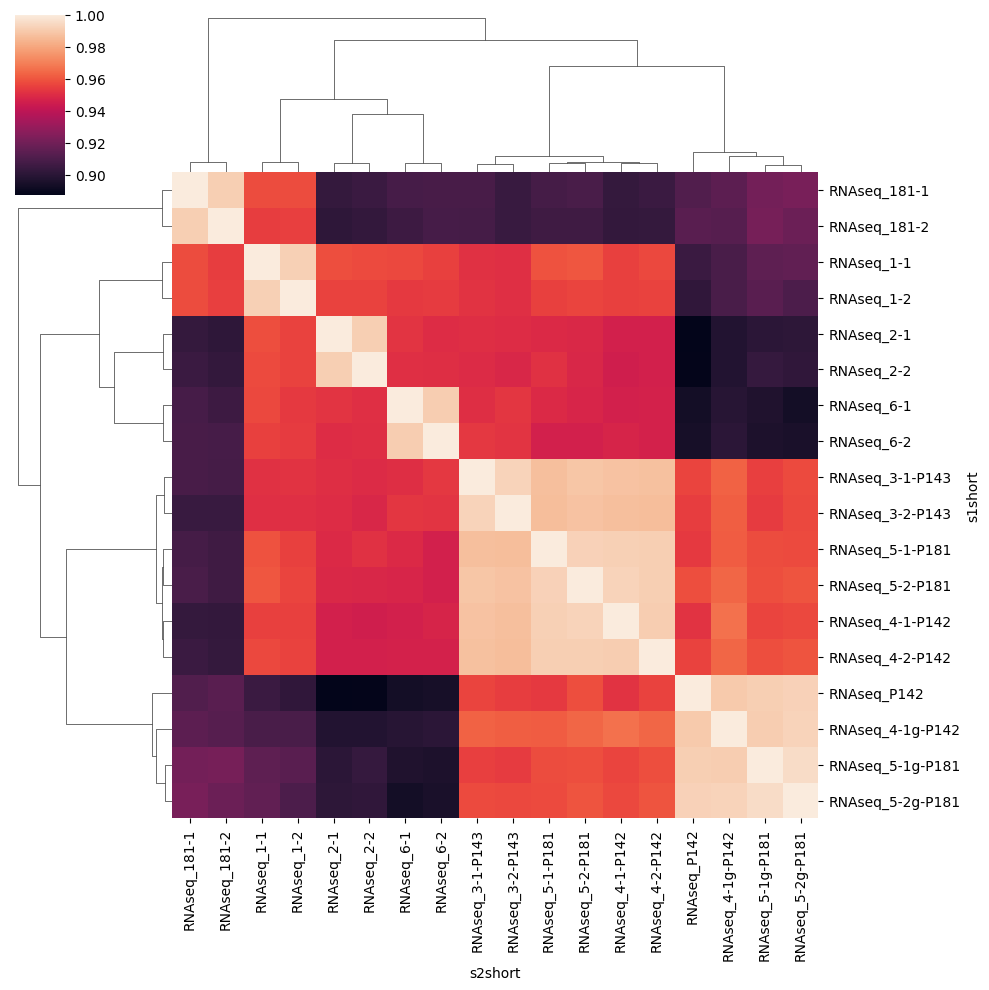

In [39]:
q = "n_alleles==0 and (experiment1=='RNAseq') and (experiment2=='RNAseq')"
# q = "n_alleles==0 and (experiment1=='RNAseq' or experiment1=='exome') and (experiment2=='RNAseq' or experiment2=='exome')"
plot_data = summary_concordant.query(q)\
                    [["s1short","s2short","concordant_freq"]]\
                    .pivot(index="s1short", columns="s2short", values="concordant_freq")
plot_data.fillna(1, inplace=True)
import seaborn as sns
sns.clustermap(plot_data, method="average")

In [13]:
results.query("s1short=='RNAseq_4-1-P142' and s2short=='RNAseq_4-1g-P142'")["shAllels"].value_counts()

shAllels
2    1988
1     790
0      97
Name: count, dtype: int64

In [14]:
summary.query("s1short=='RNAseq_4-1-P142' and s2short=='RNAseq_4-1g-P142'")

s1short           s2short  n_alleles  count  proportion  \
535  RNAseq_4-1-P142  RNAseq_4-1g-P142          0     97    0.033739   
536  RNAseq_4-1-P142  RNAseq_4-1g-P142          1    790    0.274783   
537  RNAseq_4-1-P142  RNAseq_4-1g-P142          2   1988    0.691478   

    experiment1 experiment2  
535      RNAseq      RNAseq  
536      RNAseq      RNAseq  
537      RNAseq      RNAseq

In [19]:
summary.query("s1short=='RNAseq_4-1-P142' and s2short=='exome_P142'")

s1short     s2short  n_alleles  count  proportion experiment1  \
571  RNAseq_4-1-P142  exome_P142          0   1840    0.563208      RNAseq   
572  RNAseq_4-1-P142  exome_P142          1    559    0.171105      RNAseq   
573  RNAseq_4-1-P142  exome_P142          2    868    0.265687      RNAseq   

    experiment2  
571       exome  
572       exome  
573       exome

In [20]:
summary.query("s1short=='RNAseq_4-1g-P142' and s2short=='exome_P142'")

s1short     s2short  n_alleles  count  proportion experiment1  \
631  RNAseq_4-1g-P142  exome_P142          0     28    0.024978      RNAseq   
632  RNAseq_4-1g-P142  exome_P142          1    119    0.106155      RNAseq   
633  RNAseq_4-1g-P142  exome_P142          2    974    0.868867      RNAseq   

    experiment2  
631       exome  
632       exome  
633       exome

In [33]:
results.query("s1short=='RNAseq_4-1-P142' and s2short=='exome_P142' and shAllels==0").iloc[10:50]

Unnamed: 0 chrom       pos  \
26739       26739  chr2   9271464   
26895       26895  chr2   9271465   
27027       27027  chr2   9271466   
35295       35295  chr2   9587413   
40497       40497  chr2  10129038   
42235       42235  chr2  10443229   
42649       42649  chr2  10444092   
47741       47741  chr2  10789748   
48103       48103  chr2  10791794   
48257       48257  chr2  10793094   
59057       59057  chr2  12718272   
62851       62851  chr2  15629698   
63901       63901  chr2  17514448   
71353       71353  chr2  20034316   
73391       73391  chr2  20239949   
73547       73547  chr2  20240034   
73703       73703  chr2  20240062   
73859       73859  chr2  20240070   
74015       74015  chr2  20240081   
74171       74171  chr2  20240088   
74327       74327  chr2  20240090   
74481       74481  chr2  20240107   
74637       74637  chr2  20240167   
74793       74793  chr2  20240192   
74949       74949  chr2  20240307   
75105       75105  chr2  20240457   
75261       75261  chr2  20240477   
75417       75417  chr2  20240509   
75655       75655  chr2  20240614   
75811       75811  chr2  20240646   
75961       75961  chr2  20240648   
76103       76103  chr2  20240672   
76259       76259  chr2  20240686   
76415       76415  chr2  20240713   
76571       76571  chr2  20240750   
76883       76883  chr2  20240828   
77039       77039  chr2  20240853   
77195       77195  chr2  20240868   
77351       77351  chr2  20240888   
77507       77507  chr2  20240892   

                                                      s1  \
26739  /sf/storage/gmo/hic/out/by_User/sykozyreva/SIX...   
26895  /sf/storage/gmo/hic/out/by_User/sykozyreva/SIX...   
27027  /sf/storage/gmo/hic/out/by_User/sykozyreva/SIX...   
35295  /sf/storage/gmo/hic/out/by_User/sykozyreva/SIX...   
40497  /sf/storage/gmo/hic/out/by_User/sykozyreva/SIX...   
42235  /sf/storage/gmo/hic/out/by_User/sykozyreva/SIX...   
42649  /sf/storage/gmo/hic/out/by_User/sykozyreva/SIX...   
47741  /sf/storage/gmo/hic/out/by_User/sykozyreva/SIX...   
48103  /sf/storage/gmo/hic/out/by_User/sykozyreva/SIX...   
48257  /sf/storage/gmo/hic/out/by_User/sykozyreva/SIX...   
59057  /sf/storage/gmo/hic/out/by_User/sykozyreva/SIX...   
62851  /sf/storage/gmo/hic/out/by_User/sykozyreva/SIX...   
63901  /sf/storage/gmo/hic/out/by_User/sykozyreva/SIX...   
71353  /sf/storage/gmo/hic/out/by_User/sykozyreva/SIX...   
73391  /sf/storage/gmo/hic/out/by_User/sykozyreva/SIX...   
73547  /sf/storage/gmo/hic/out/by_User/sykozyreva/SIX...   
73703  /sf/storage/gmo/hic/out/by_User/sykozyreva/SIX...   
73859  /sf/storage/gmo/hic/out/by_User/sykozyreva/SIX...   
74015  /sf/storage/gmo/hic/out/by_User/sykozyreva/SIX...   
74171  /sf/storage/gmo/hic/out/by_User/sykozyreva/SIX...   
74327  /sf/storage/gmo/hic/out/by_User/sykozyreva/SIX...   
74481  /sf/storage/gmo/hic/out/by_User/sykozyreva/SIX...   
74637  /sf/storage/gmo/hic/out/by_User/sykozyreva/SIX...   
74793  /sf/storage/gmo/hic/out/by_User/sykozyreva/SIX...   
74949  /sf/storage/gmo/hic/out/by_User/sykozyreva/SIX...   
75105  /sf/storage/gmo/hic/out/by_User/sykozyreva/SIX...   
75261  /sf/storage/gmo/hic/out/by_User/sykozyreva/SIX...   
75417  /sf/storage/gmo/hic/out/by_User/sykozyreva/SIX...   
75655  /sf/storage/gmo/hic/out/by_User/sykozyreva/SIX...   
75811  /sf/storage/gmo/hic/out/by_User/sykozyreva/SIX...   
75961  /sf/storage/gmo/hic/out/by_User/sykozyreva/SIX...   
76103  /sf/storage/gmo/hic/out/by_User/sykozyreva/SIX...   
76259  /sf/storage/gmo/hic/out/by_User/sykozyreva/SIX...   
76415  /sf/storage/gmo/hic/out/by_User/sykozyreva/SIX...   
76571  /sf/storage/gmo/hic/out/by_User/sykozyreva/SIX...   
76883  /sf/storage/gmo/hic/out/by_User/sykozyreva/SIX...   
77039  /sf/storage/gmo/hic/out/by_User/sykozyreva/SIX...   
77195  /sf/storage/gmo/hic/out/by_User/sykozyreva/SIX...   
77351  /sf/storage/gmo/hic/out/by_User/sykozyreva/SIX...   
77507  /sf/storage/gmo/hic/out/by_User/sykozyreva/SIX...   

                            

In [24]:
filename

'allBams.DP10.calls.vcf'

In [35]:
import vcfpy
import tqdm
reader = vcfpy.Reader.from_path(filename)
for record in tqdm.tqdm(reader):
    if record.POS==10789748:
        break

343098it [01:25, 4021.38it/s]


In [37]:
record

Record('chr2', 10789748, [], 'C', [Substitution(type_='SNV', value='T')], 228.405, ['PASS'], {'VDB': 0.28, 'SGB': -0.453602, 'RPBZ': 1.77356, 'MQBZ': 0.136717, 'MQSBZ': 0.990867, 'BQBZ': -2.52544, 'SCBZ': -0.19424, 'MQ0F': 0.0, 'MQ': 59, 'DP': 459, 'DP4': [72, 66, 58, 207], 'AN': 26, 'AC': [20]}, ['GT', 'DP', 'AD', 'PL'], [Call('/sf/storage/gmo/hic/out/by_Project/Six2/BAC_enrichment/July24_bam/trimmed/P10.dedups.bam', {'GT': './.', 'DP': None, 'AD': [], 'PL': []}), Call('/sf/storage/gmo/hic/out/by_Project/Six2/BAC_enrichment/July24_bam/trimmed/P142.dedups.bam', {'GT': './.', 'DP': None, 'AD': [], 'PL': []}), Call('/sf/storage/gmo/hic/out/by_Project/Six2/BAC_enrichment/July24_bam/trimmed/P143.dedups.bam', {'GT': './.', 'DP': None, 'AD': [], 'PL': []}), Call('/sf/storage/gmo/hic/out/by_Project/Six2/BAC_enrichment/July24_bam/trimmed/P181.dedups.bam', {'GT': './.', 'DP': None, 'AD': [], 'PL': []}), Call('F008254-4-I-ExC93-xgenV2', {'GT': '0/0', 'DP': 109, 'AD': [107, None], 'PL': []}), Cal